In [1]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext pycodestyle_magic

In [2]:
A = np.array([[3, 2], [2, 6]])
b = np.array([2, -8])

In [3]:
def f(x, y):
    vec_x = np.array([x, y])
    return np.einsum('i...,ij,j...', vec_x, A, vec_x) / 2 - np.einsum('i...,i', vec_x, b)

In [4]:
x_min = np.linalg.solve(A, b)
print(x_min)

[ 2. -2.]


In [37]:
def cg_method(x0):
    n = len(x0)
    ds = np.zeros((n, n))
    xs = np.zeros((n+1, n))
    xs[0] = x0
    r = b - A @ x0
    ds[0] = r

    for i in range(1, n+1):
        # Step size
        eta = (r @ r) / (ds[i-1].T @ A @ ds[i-1])
        
        
        # Update position
        xs[i] = xs[i-1, :] + eta * ds[i-1]
        
        if (i==n):
            break
        
        # Residual
        r_new = r - eta * A @ ds[i-1, :]

        # Projection coefficient
        beta = (r_new @ r_new) / (r @ r)
        
        # new search direction
        ds[i] = r_new + beta * ds[i-1, :]
        
        r = r_new
        
    return xs, ds

In [38]:
def plot(xs):
    fig = plt.figure()
    ax = plt.axes()
    plt.axes().set_aspect('equal', 'datalim')

    x = np.linspace(-6, 6, 30)
    y = np.linspace(-4, 4, 30)

    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    ax.contour(X, Y, Z)
    ax.plot(xs[:, 0], xs[:, 1], marker="o", markersize=2, color="orange")

    plt.show()
    fig.savefig('cg_method.png', dpi=300)

xs [[-2.         -2.        ]
 [ 0.08       -0.61333333]
 [ 2.         -2.        ]]


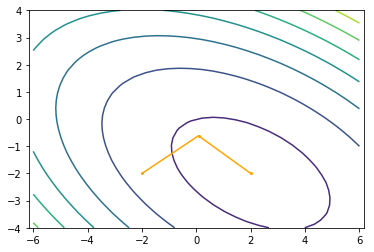

In [39]:
x0 = np.array([-2, -2])
xs, _ = cg_method(x0)
print("xs", xs[:])
plot(xs)